In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import mglearn

# create a synthetic dataset
X, y = make_blobs(random_state=0)

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set
logistics_regression = LogisticRegression().fit(X_train, y_train)

# evaluate the model on the test set
print("Test set score: {:.2f}".format(logistics_regression.score(X_test, y_test)))

Test set score: 0.88


## Cross-Validation

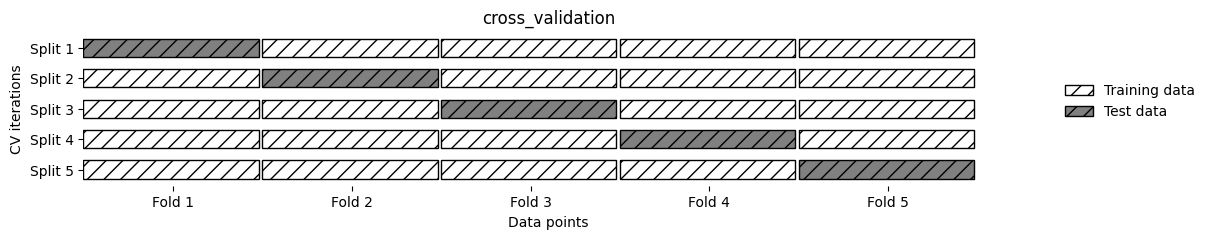

In [2]:
mglearn.plots.plot_cross_validation()

### Cross-Validation in scikit-learn

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logistic_regression = LogisticRegression(max_iter=1000)

scores = cross_val_score(logistic_regression, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


In [4]:
scores = cross_val_score(logistic_regression, iris.data, iris.target)
print("Cross-validation score: {}".format(scores))

Cross-validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Average cross-validation score: 0.973


## Stratified k-Fold Cross-Validation and Other Strategies

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


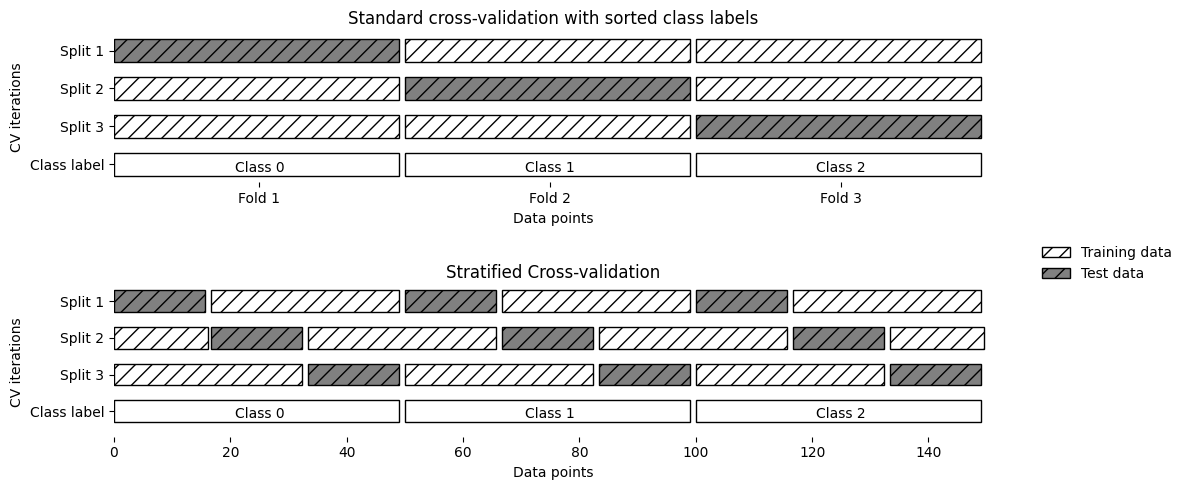

In [7]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [9]:
print("Cross-validation scores:\n{}".format(cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [10]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-one-out cross-validation

In [12]:
from sklearn.model_selection import LeaveOneOut
leave_one_out = LeaveOneOut()
scores = cross_val_score(logistic_regression, iris.data, iris.target, cv=leave_one_out)
print("Number of cv itrerations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv itrerations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation

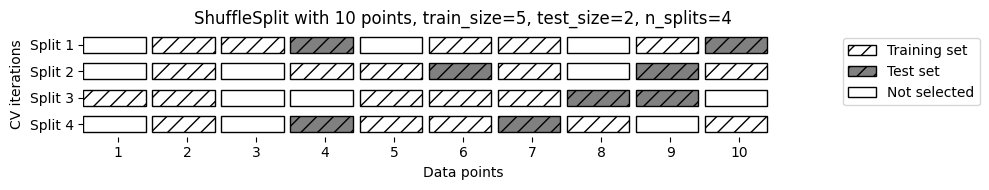

In [13]:
mglearn.plots.plot_shuffle_split()


In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logistic_regression, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96       0.92       0.98666667 0.92       0.93333333 0.96
 0.94666667 0.98666667 0.94666667 0.97333333]


### Cross-validation with groups

In [15]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong the the same group then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logistic_regression, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


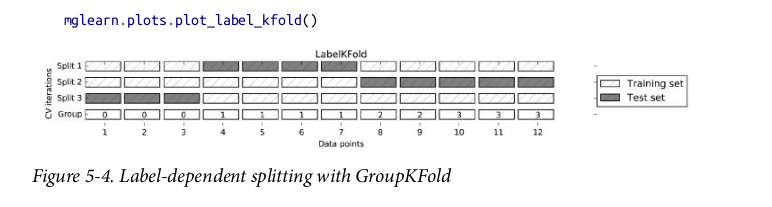

## Grid Search

## Simple Grid Search

In [16]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}     size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

Size of training set: 112     size of test set: 38
Best Score: 0.97
Best Parameters: {'C': 100, 'gamma': 0.001}


## The Danger of Overfitting the Parameters and the Validation Set

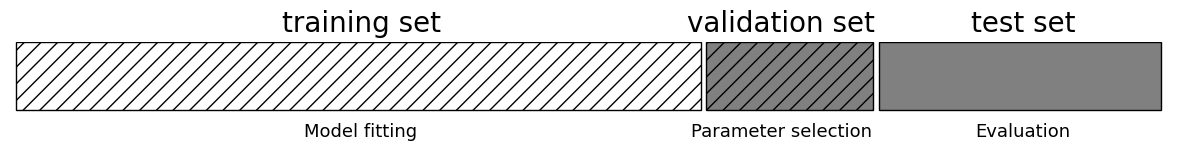

In [17]:
mglearn.plots.plot_threefold_split()

In [18]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and calidation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}     size of validation set: {}      size of test set: {}\n".format(X_train.shape[0], X_validation.shape[0], X_test.shape[0]))


best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_validation, y_validation)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}  

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84     size of validation set: 28      size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

In [19]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)

        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


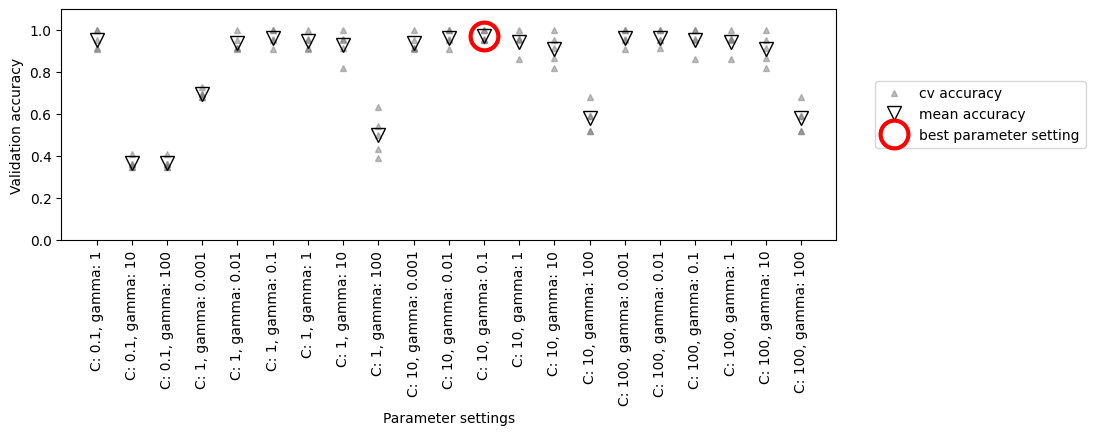

In [20]:
mglearn.plots.plot_cross_val_selection()

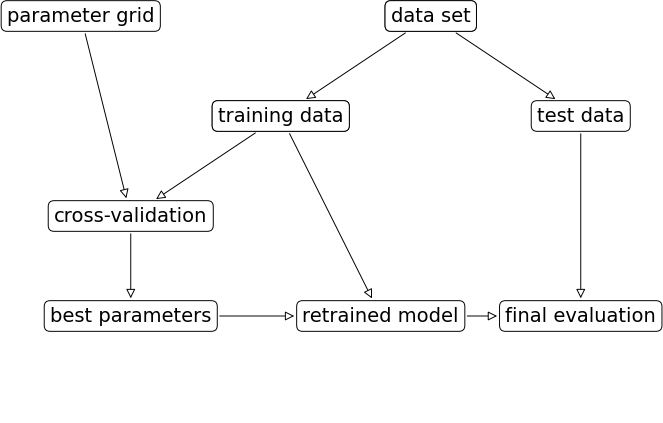

In [21]:
mglearn.plots.plot_grid_search_overview()

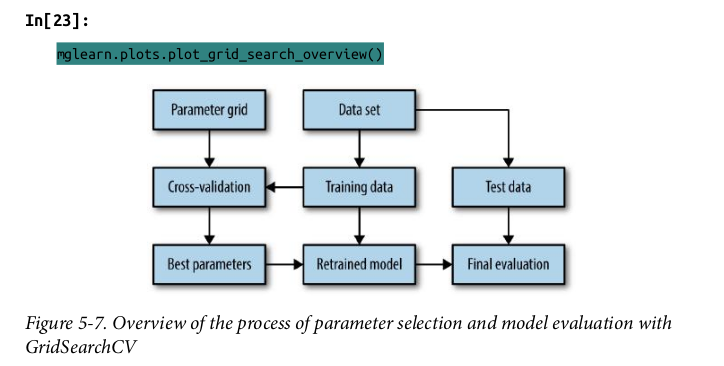

In [22]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [25]:
grid_search.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.001, 0.01, ...], 'gamma': [0.001, 0.01, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [26]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [27]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [28]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [29]:
from pprint import pprint
pprint(grid_search.best_estimator_.get_params())

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [30]:
import pandas as pd


# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000904,0.000231,0.000609,0.000335,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000762,0.000136,0.000475,0.000061,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000633,0.000072,0.000365,0.000028,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000650,0.000050,0.000420,0.000099,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000562,0.000013,0.000337,0.000012,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


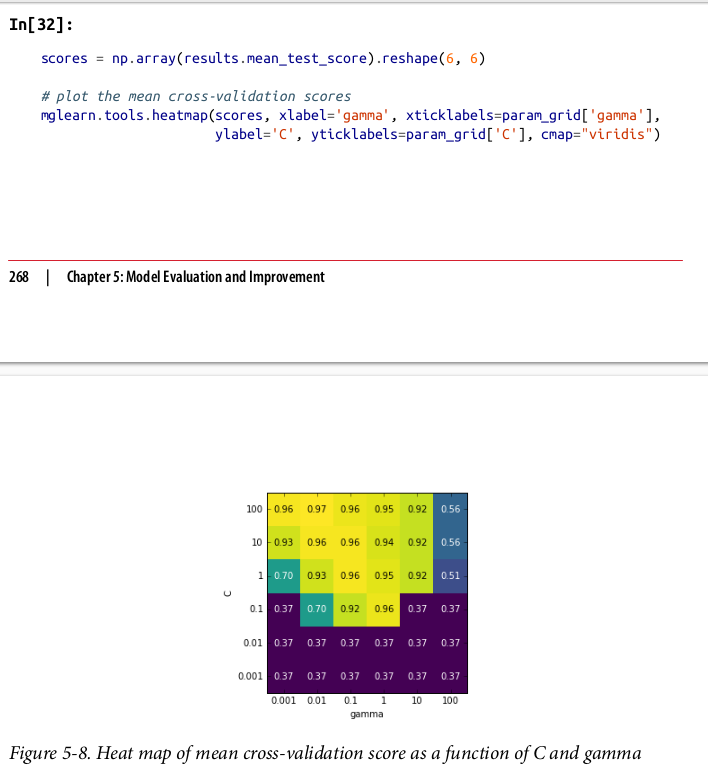

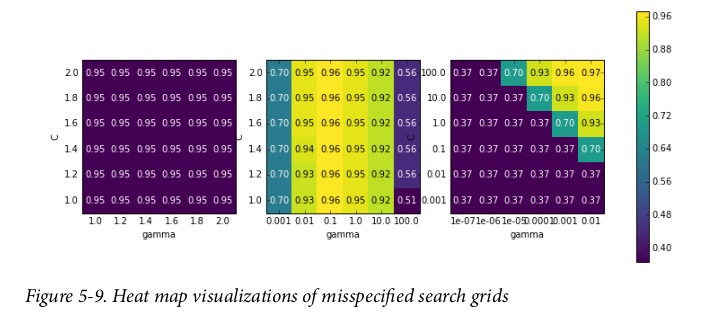

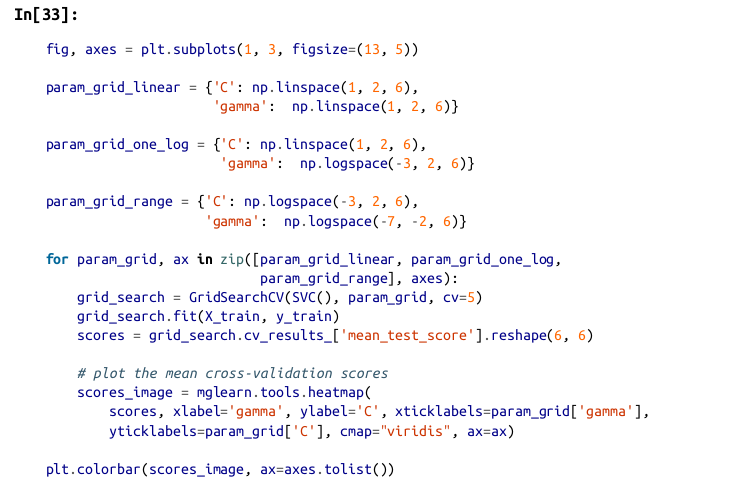

In [31]:
param_grid = [{"kernel": ["rbf"],
               "C": [0.001, 0.01, 0.1, 1, 10, 100]},
               {"kernel": ["linear"],
                "C": [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [32]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [33]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.001585,0.000697,0.001173,0.000533,0.000631,0.000486,0.000565,0.000506,0.000416,0.00042,0.000411,0.000422
std_fit_time,0.000448,0.000082,0.000367,0.000036,0.000183,0.00005,0.00004,0.000022,0.000015,0.000035,0.000007,0.000025
mean_score_time,0.001019,0.000433,0.000787,0.000349,0.000353,0.000301,0.000303,0.000297,0.000282,0.000274,0.000273,0.000276
std_score_time,0.000428,0.000069,0.000257,0.000031,0.000068,0.000017,0.000005,0.000017,0.000014,0.000009,0.000005,0.000017
param_C,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.869565,1.0,1.0,1.0,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.826087,0.956522,0.956522,0.956522,0.347826,0.869565,0.913043,0.956522,1.0,0.956522
split2_test_score,0.363636,0.363636,0.727273,1.0,1.0,0.954545,0.363636,0.772727,1.0,1.0,1.0,1.0


In [34]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.93333333 1.        ]
Mean cross-validation score:  0.96


In [35]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []

    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples, in outer_cv.split(X, y):
        # find the best parameter using inner cross-validation
        best_parameters = {}
        best_score = -np.inf
        
        # iterative over parameters
        for parameters in parameter_grid:
            
            # accumulate score over inner splits
            cv_scores = []

            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                
                # build classifier given parameters and training data
                classifier = Classifier(**parameters)
                classifier.fit(X[inner_train], y[inner_train])

                # evaluate on inner test set
                score = classifier.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:

                # if better than so far, remember parameters
                best_score = mean_score
                best_parameters = parameters
        
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_parameters)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [36]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


## Evaluation Metrics and Scoring

## Metrics for Binary Classification

### Kinds of errors

### Imbalanced datasets

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)


In [38]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
prediction_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [40]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
prediction_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logistic_regression = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
prediction_logistic_regression = logistic_regression.predict(X_test)
print("logistic_regression: {:.2f}".format(logistic_regression.score(X_test, y_test)))

dummy score: 0.90
logistic_regression: 0.98


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, prediction_logistic_regression)
print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[402   1]
 [  6  41]]


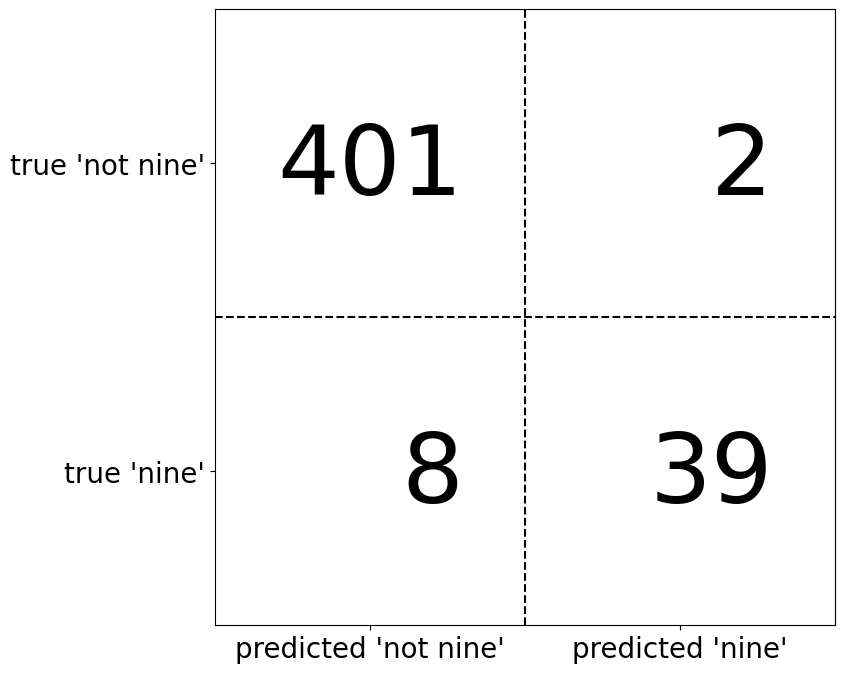

In [42]:
mglearn.plots.plot_confusion_matrix_illustration()

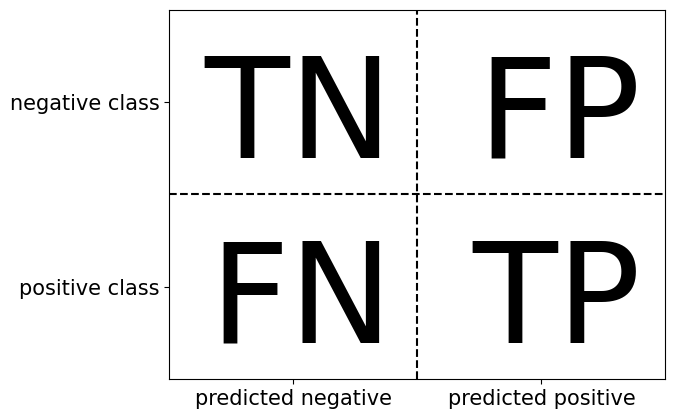

In [43]:
mglearn.plots.plot_binary_confusion_matrix()

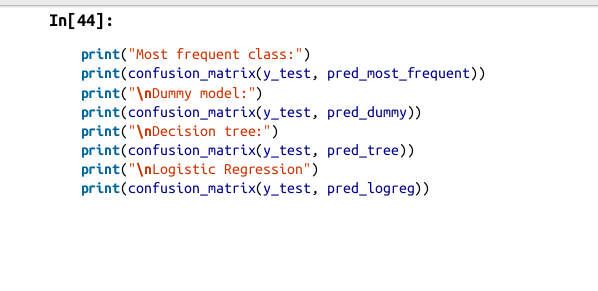

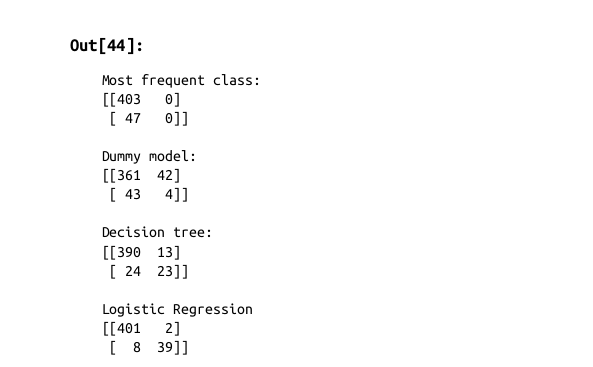